# Project_2020-Fundamentals-of-Data-Analysis
***
## Project Instructions
***
In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## Research

***
#### What is simple linear regression?
In statistics regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change [1].

Simple linear regression is a method that's used for multivariate data (two or more variables). For this project it'll be used to study the relationship between two continuos variables. For now consier these variables 'x' and 'y' [2].

- 'x' is regarded as the predictor, explanatory, or independent variable.
- 'y' is regarded as the the response, outcome, or dependent variable.

With simple linear regression there are two types of relationships;

- Deterministic
- Statistical

#### *Deterministc relationship*

Deterministic is when the relationship between the two variables is perfectly described by an equation [2]. Ohms law is a good example of this type of relationship. A picture paints a thousand words so refer to Figure 1 for a scatter plot of Ohm's law. 

For the scatter plot in Figure 1 there are 200 values between 0 and 20 randomly generated using the randint function from NumPy [3]. These values represent the current (I). The resistance (R) is the constant (slope of the line) which is 4 ohms. The voltage is directly proportional to the current, showing this to be a deterministic relationship.

$$Ohms Law: V = I x R$$

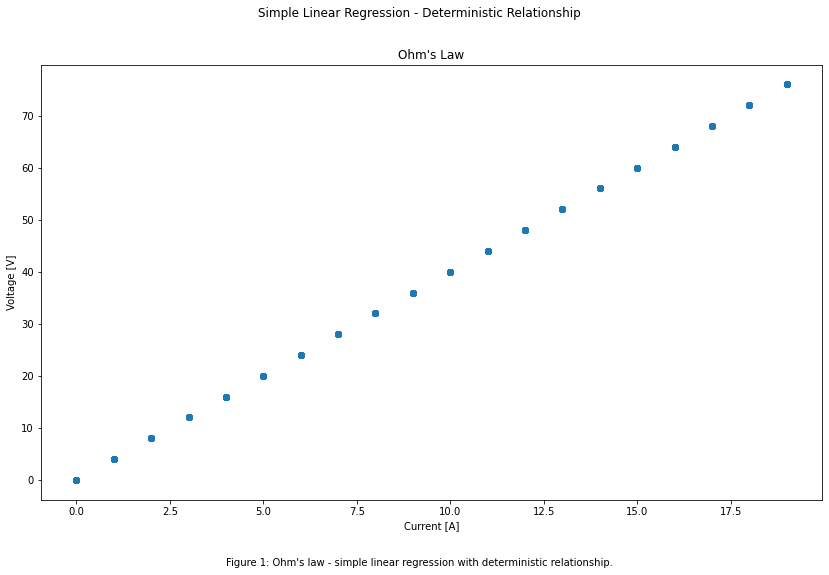

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#I = current
#R = resistance
#V = applied voltage
I = np.random.randint(0,20, size = 200)

R = 4
V = I*R

plt.figure(figsize=(14, 8))
plt.scatter(I, V,)
plt.title("Ohm's Law")
plt.suptitle("Simple Linear Regression - Deterministic Relationship")
plt.xlabel("Current [A]", color = "black")
plt.ylabel("Voltage [V]", color = "black")
txt="Figure 1: Ohm's law - simple linear regression with deterministic relationship."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

From Figure 1 it can be seen that the relationship between current and voltage is perfect, evident by the perfectly straight line. The equation for a straight line is:
$$ y = mx + C$$

Also of interest here is the similarity between the straight line equation and the Ohm's Law equation: $ y = mx$ (with intercept at 0) and $V = IR+0$.

where:
- y = V = voltage
- m = R = resistance
- x = I = current
- C = 0 = intercept

That concludes the discussion on deterministic relationships. For this project the focus will be on statistical simple linear regression where there is no perfect relationship between the variables.

#### *Statistical Simple Linear Regression*
With statistical simple linear regression the relationship between the variables is not perfect. A good example of a statistical simple linear regression is the relationship between height and weight. Refer to Figure 2 for a scatter plot of height vs weight, it can be seen that there is a positive correlation but it's not a perfect relationship like the deterministic example in Figure 1.

In [2]:
from numpy import genfromtxt
whdf = genfromtxt('weight-height.csv', delimiter=',')
#print the number of columns in the array
print('The shape of the numpy array is (rows, columns):' )
print(np.shape(whdf))
print()

#take a look at the array to see which columns height and weight are stored
print(whdf)
print()
print('Height and weight are stored in the second and third columns in the array:' )

The shape of the numpy array is (rows, columns):
(5000, 3)

[[         nan  73.84701702 241.8935632 ]
 [         nan  68.78190405 162.3104725 ]
 [         nan  74.11010539 212.7408556 ]
 ...
 [         nan  67.01379497 199.1954001 ]
 [         nan  71.55771849 185.9059095 ]
 [         nan  70.35187988 198.9030119 ]]

Height and weight are stored in the second and third columns in the array:


From the 'print(np.shape(whdf))' command above it can be seen that there are 5000 rows and 3 columns in the numpy array. Then using the 'print(whdf)' command it can be seen that the height and weight are stored in column 2 and 3, which in terms of the array are positions 1 and 2. The column location for the variables of interest is required to plot a scatter plot in order to study the relationship between these variables;

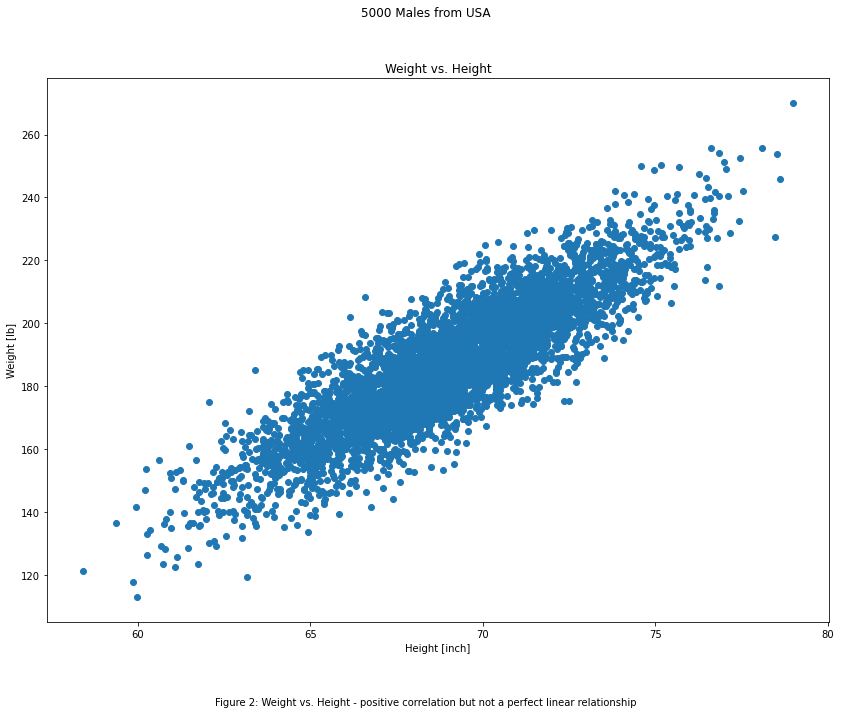

In [3]:
plt.figure(figsize=(14,10))
plt.scatter((whdf[:,1]), (whdf[:,2]))
plt.title("Weight vs. Height")
plt.suptitle("5000 Males from USA")
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 2: Weight vs. Height - positive correlation but not a perfect linear relationship"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

From Figure 2 it can be seen that there is a positive correlation between height and weight, however it is also evident that this is not a perfect linear relationship. This is an example of where statistical simple linear regression comes into play where a line of best fit can be fitted to the data. The difference between 'deterministic' and 'statistical' simple linear regression is presented in side by side scatter plots in Figure 3.

With reference to statistical simple linear regression the obvious question is, how good is the fit, how good does it need to be, how is it calculated etc.. This leads into the next section of this project where the workings of statistical simple linear regression is researched.

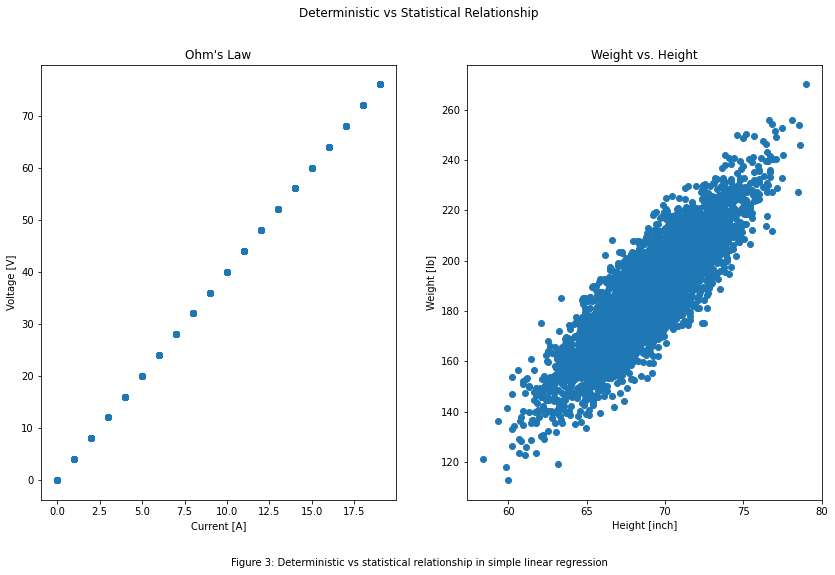

In [4]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.scatter(I, V,)
plt.title("Ohm's Law")
plt.suptitle("Simple Linear Regression - Deterministic Relationship")
plt.xlabel("Current [A]", color = "black")
plt.ylabel("Voltage [V]", color = "black")
plt.subplot(1, 2, 2)
plt.scatter((whdf[:,1]), (whdf[:,2]))
plt.title("Weight vs. Height")
plt.suptitle("Deterministic vs Statistical Relationship")
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 3: Deterministic vs statistical relationship in simple linear regression"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

### How does statistical simple linear regression work?
***
The aim of regression is to find the linear relationship between two variables. This is in turn translated into a mathematical problem of finding the equation of the line that is closest to all points observed [4] Simply put regression works by fitting a line of best fit to the data.

#### How is the line of best fit determined?
On a scatter plot like Figure 2, when a line of best fit is drawn some points will lie above the line and some below. The vertical distance each point is from the line is recorded and know as deviations or errors [4]. The regression line (line of best fit) is determined by minimising the sum total of the squares of the deviations or errors. This principle is known as the least-squares method and is commonly used to find the regression line.

#### Important considerations
The first step is to look carefully at the data:
1. Is there an upwards/downwards trend in the data or could a horizontal line be fit though the data?
2. Is the trend linear or curvilinear?
3. Is there constant variance along the regression line or does it systematically change as the predictor variable changes? [5]

#### Assumptions for statistical simple linear regression
Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are:
- Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.
- Independence of observations: the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.
- Normality: The data follows a normal distribution.
- The relationship between the independent and dependent variable is linear: the line of best fit through the data points is a straight line (rather than a curve or some sort of grouping factor).[1]

### Why and where Statistical Simple Linear Regression work
***

## Development
***
The goal of this project is to accurately predict wind turbine power output from wind speed values using the data set as a basis. As called out previously the methodology when starting to analyse any new problem is to look carefully at the data and check;

1. Is there an upwards/downwards trend in the data or could a horizontal line be fit though the data?
2. Is the trend linear or curvilinear?
3. Is there constant variance along the regression line or does it systematically change as the predictor variable changes? [5]

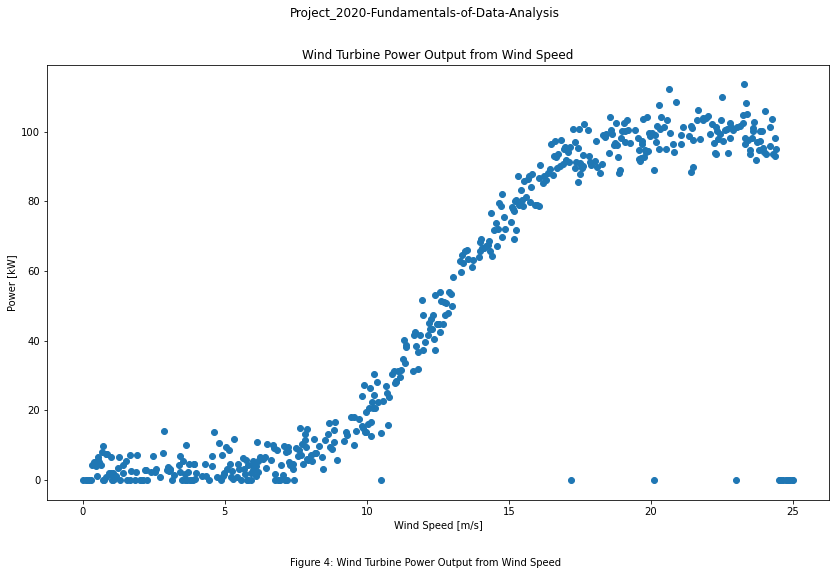

In [5]:
df = genfromtxt('powerproduction.csv', delimiter=',')
df = np.delete(df, 0, 0) #[1]
plt.figure(figsize=(14,8))
plt.scatter((df[:,0]), (df[:,1]))
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
txt="Figure 4: Wind Turbine Power Output from Wind Speed"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

With reference to Figure 4 it can be seen that the power production data set exhibits the following:

1. Upward trend in the data.
2. Curvilinear trend.
3. Constant variance.

Given the fact that the power production data set has a curvlinear trend it has been decided to park this data set for now. It has been decided to start by analysing a data set that has a linear trend first. The height vs weight data set from Figure 2 has a linear trend so this data set will be analysed first. Refer to Figure 5 for side by side scatter plots of curvlinear and linear trending data.

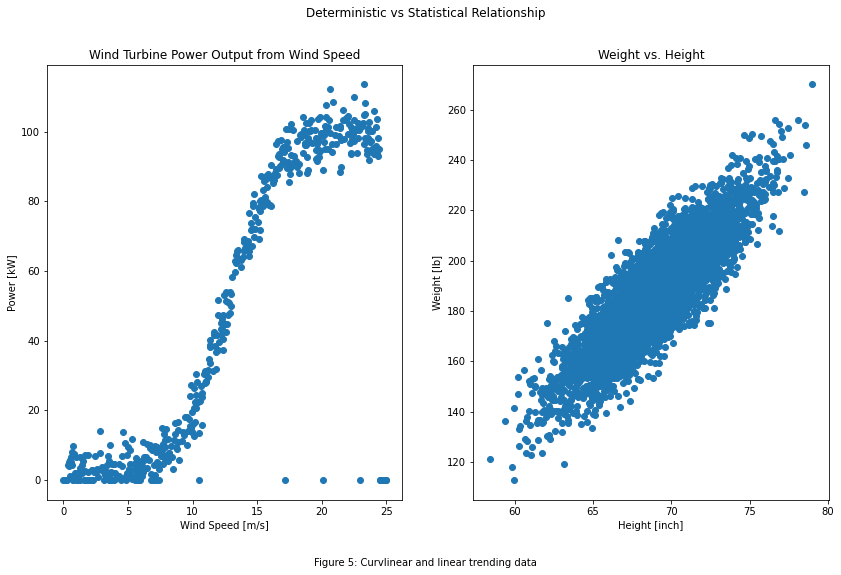

In [6]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.scatter((df[:,0]), (df[:,1]))
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
plt.subplot(1, 2, 2)
plt.scatter((whdf[:,1]), (whdf[:,2]))
plt.title("Weight vs. Height")
plt.suptitle("Deterministic vs Statistical Relationship")
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 5: Curvlinear and linear trending data"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

### Simple linear regression of height vs weight

With reference to Figure 5 it can be seen that the height vs weight data set exhibits the following;

1. Upward trend in the data.
2. linear trend.
3. Constant variance.

In [7]:
height = whdf[:,1]
weight = whdf[:,2]
print(height.shape)
print(weight.shape)

(5000,)
(5000,)


In [8]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit([weight], [height])

### References
[1] Scribbr; An introduction to simple linear regression; https://www.scribbr.com/statistics/simple-linear-regression/

[2] The Pennsylvania State University; What is Simple Linear Regression?; https://online.stat.psu.edu/stat462/node/91/

[3] NumPy.Org; numpy.random.randint; https://numpy.org/doc/1.19/reference/random/generated/numpy.random.randint.html?highlight=random

[4] Stony Brook University; Regression: Finding the equation of the line of best fit ;http://www.ams.sunysb.edu/~zhu/ams571/Regression.pdf

[5] https://www.statstutor.ac.uk/resources/uploaded/slregression.pdf

https://note.nkmk.me/en/python-numpy-delete/


